<a href="https://colab.research.google.com/github/divsal009/div/blob/master/CNN_ECG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## **'Normal beats','Unknown Beats','Ventricular ectopic beats', 'Supraventricular ectopic beats','Fusion Beats'**

In [5]:
train_data=pd.read_csv('/content/drive/My Drive/Medical Data/ECG/mitbih_train.csv',header=None)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
test_data=pd.read_csv('/content/drive/My Drive/Medical Data/ECG/mitbih_test.csv',header=None)

In [8]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,0.063536,0.082873,0.085635,0.093923,0.113260,0.124309,0.140884,0.132597,0.140884,0.091160,0.085635,0.074586,0.071823,0.080110,0.096685,0.118785,0.138122,0.140884,0.138122,0.146409,0.110497,0.102210,0.060773,0.027624,0.038674,0.013812,0.011050,0.013812,0.033149,0.005525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,0.131455,0.122066,0.140845,0.159624,0.150235,0.145540,0.136150,0.169014,0.178404,0.173709,0.183099,0.201878,0.187793,0.164319,0.187793,0.215962,0.215962,0.201878,0.211268,0.230047,0.215962,0.230047,0.239437,0.267606,0.253521,0.230047,0.220657,0.225352,0.211268,0.173709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# EDA

In [9]:
train_data.isna().sum()


0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [10]:
#TARGET CONVERT TO INT
train_data.iloc[:, 187].unique()


array([0., 1., 2., 3., 4.])

In [11]:
train_data[187] = train_data[187].astype('int') 


In [12]:
test_data[187] = test_data[187].astype('int')


In [13]:
train_data[187].value_counts()


0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64

<Figure size 1080x720 with 0 Axes>

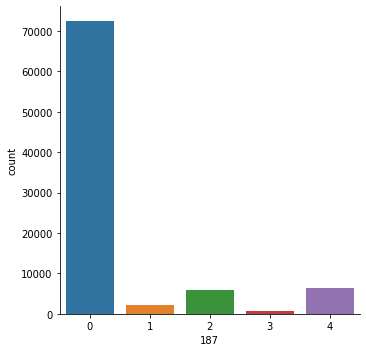

In [14]:
plt.figure(figsize=(15,10))
sns.catplot(x = 187, kind = 'count', data = train_data)
plt.show()

([<matplotlib.patches.Wedge at 0x7f788d0ab240>,
 [Text(-0.9427974976112825, 0.5666858728589446, ''),
  Text(0.7246136625914988, -0.8276080231521041, ''),
  Text(1.0074182091923962, -0.44171093691189695, ''),
  Text(1.091312106928212, -0.13797784340939367, ''),
  Text(1.0997090556586326, -0.025298081002296184, '')])

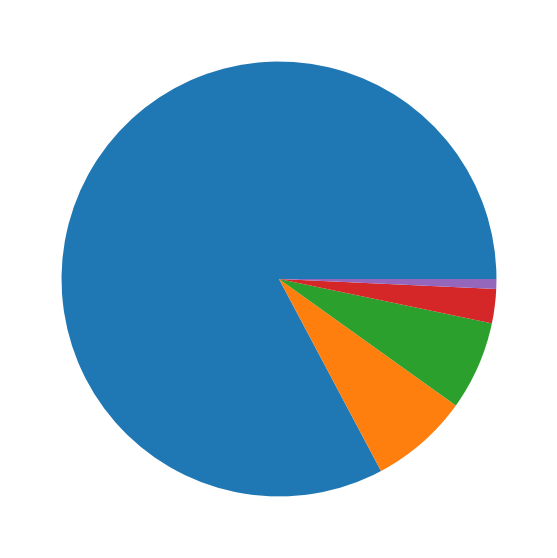

In [15]:
plt.figure(figsize=(10,10))
plt.pie(train_data[187].value_counts())

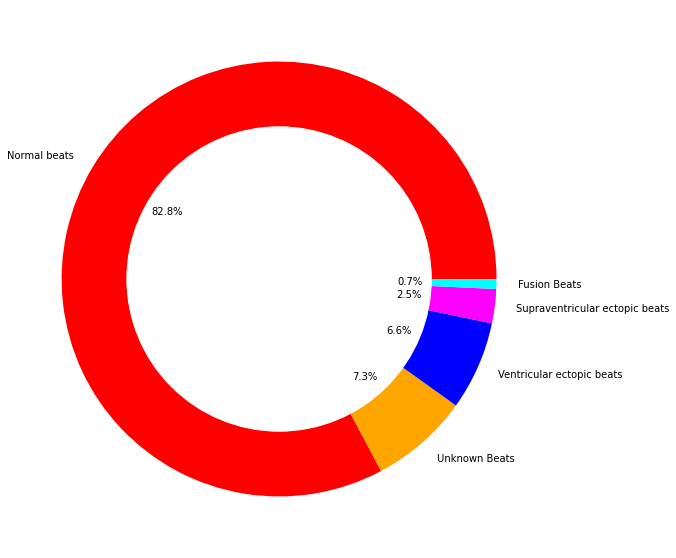

In [16]:
plt.figure(figsize=(10,10))
my_circle = plt.Circle((0,0), 0.7, color = 'white')
plt.pie(train_data[187].value_counts(), labels = ['Normal beats','Unknown Beats','Ventricular ectopic beats', 'Supraventricular ectopic beats','Fusion Beats'],
        colors = ['red', 'orange', 'blue', 'magenta', 'cyan'], autopct = '%1.1f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


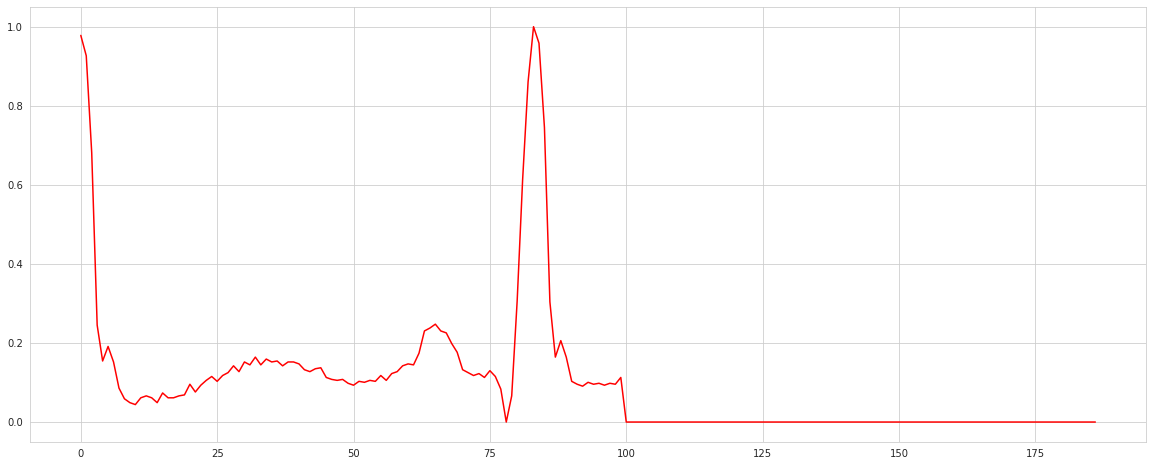

In [17]:
# Show Normal Heartbeat
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.plot(train_data.iloc[0, 0:187], color = 'red')
plt.show()


In [18]:
# Splitting Data into Classwise C0 - C4
M = train_data.values
# Input Data - All the values except last column
X = M[:, :-1]
# Last Class column 
y = M[:, -1].astype('int')


In [19]:
# Splitting Data Indexes of various classes
C0 = np.argwhere(y == 0).flatten()
C1 = np.argwhere(y == 1).flatten()
C2 = np.argwhere(y == 2).flatten()
C3 = np.argwhere(y == 3).flatten()
C4 = np.argwhere(y == 4).flatten()


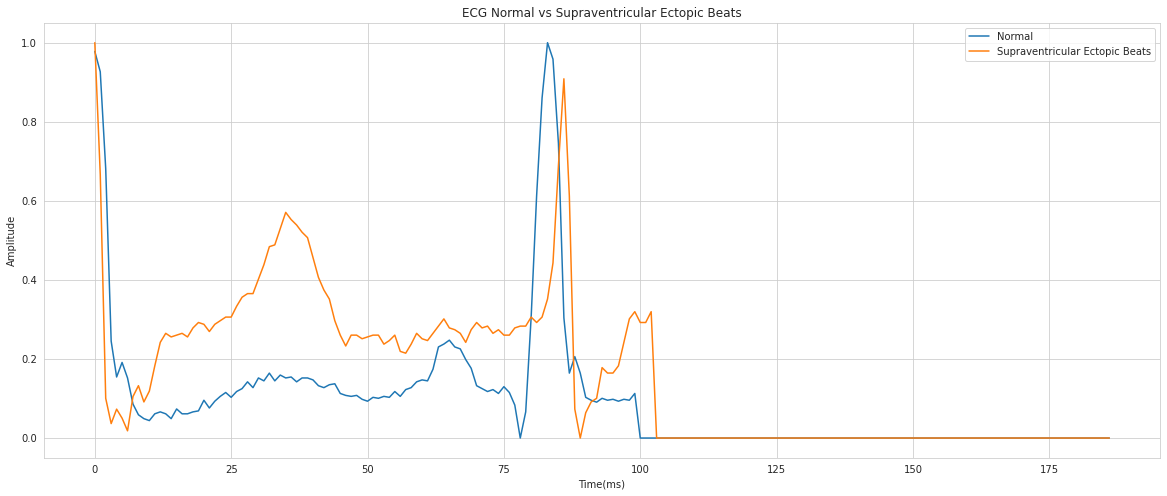

In [20]:
# Show Normal Heartbeat
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.plot(X[C0, :][0], label = 'Normal')
plt.plot(X[C1, :][0], label = 'Supraventricular Ectopic Beats')
plt.title("ECG Normal vs Supraventricular Ectopic Beats")
plt.xlabel("Time(ms)")
plt.ylabel("Amplitude")
plt.legend()
plt.show() 


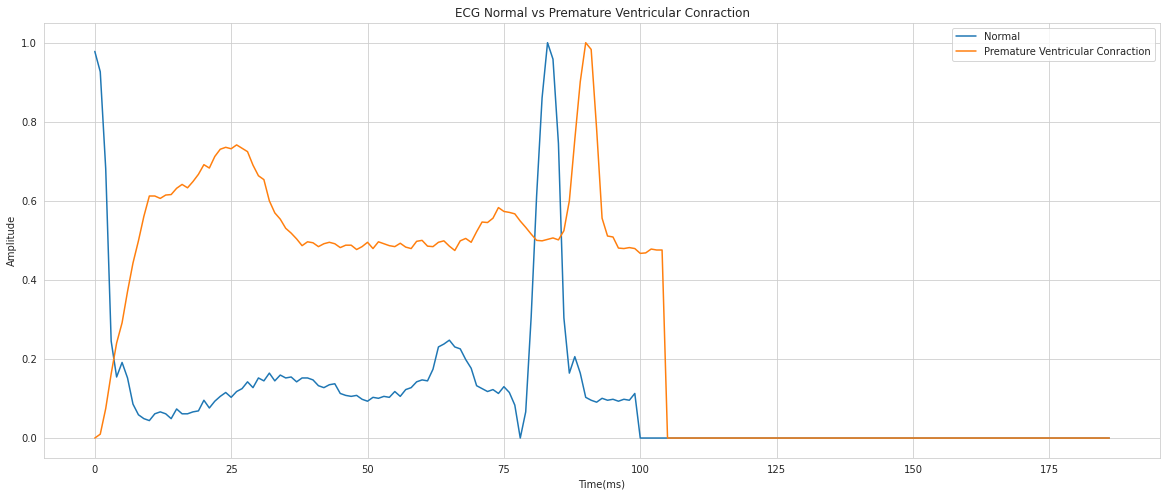

In [21]:
# Show Normal Heartbeat
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.plot(X[C0, :][0], label = 'Normal')
plt.plot(X[C2, :][0], label = 'Premature Ventricular Conraction')
plt.title("ECG Normal vs Premature Ventricular Conraction")
plt.xlabel("Time(ms)")
plt.ylabel("Amplitude")
plt.legend()
plt.show() 



# **Data Augmentation**

In [22]:
train_data[187].value_counts()

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64

In [23]:
from sklearn.utils import resample
df_1 = train_data[train_data[187] == 1]
df_2 = train_data[train_data[187] == 2]
df_3 = train_data[train_data[187] == 3]
df_4 = train_data[train_data[187] == 4]


In [24]:
df_1_upsample = resample(df_1 , n_samples = 20000, replace = True, random_state = 123)
df_2_upsample = resample(df_2 , n_samples = 20000, replace = True, random_state = 123)
df_3_upsample = resample(df_3 , n_samples = 20000, replace = True, random_state = 123)
df_4_upsample = resample(df_4 , n_samples = 20000, replace = True, random_state = 123) 

In [25]:
# Select randomly 20000 data from Class == 0
df_0 = train_data[train_data[187] == 0].sample(n = 20000, random_state = 42)


In [26]:
# Merging all the dataframes
train_df = pd.concat([df_0, df_1_upsample, df_2_upsample, df_3_upsample, df_4_upsample])


In [27]:
train_df[187].value_counts()

4    20000
3    20000
2    20000
1    20000
0    20000
Name: 187, dtype: int64

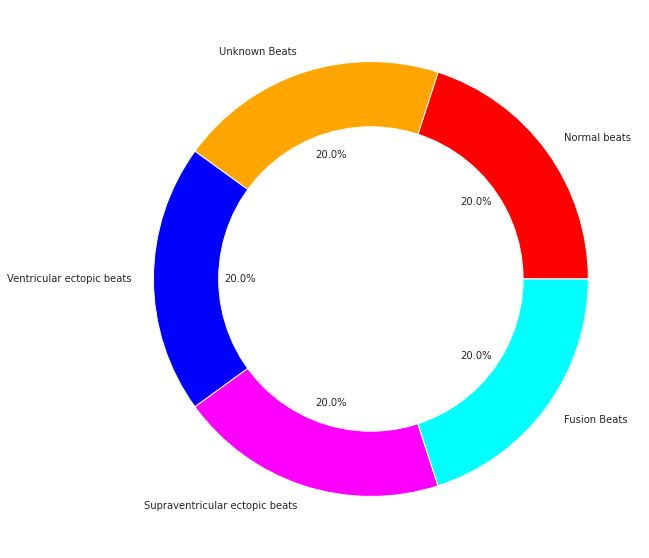

In [28]:
plt.figure(figsize=(10,10))
my_circle = plt.Circle((0,0), 0.7, color = 'white')
plt.pie(train_df[187].value_counts(), labels = ['Normal beats','Unknown Beats','Ventricular ectopic beats', 'Supraventricular ectopic beats','Fusion Beats'],
        colors = ['red', 'orange', 'blue', 'magenta', 'cyan'], autopct = '%1.1f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [29]:
target_train = train_df[187]
target_test = test_data[187]

In [30]:
from keras.utils.np_utils import to_categorical
# In MultiClass classification one hot Encoding is compulsory 
y_train = to_categorical(target_train)


Using TensorFlow backend.


# **one hot Encoding**

In [31]:
#0 [1,0,0,0,0]
#1[0,1,0,0,0]
#4[0,0,0,0,1]

In [32]:
y_train

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [33]:
y_test = to_categorical(target_test)

# **Feature & Labels**

In [34]:
X_train = train_df.iloc[:, :-1].values
X_test = test_data.iloc[:, :-1].values

In [35]:
X_train.shape

(100000, 187)

In [36]:
X_train

array([[0.1627907 , 0.54069769, 0.75581396, ..., 0.        , 0.        ,
        0.        ],
       [0.99006623, 0.93874174, 0.34437087, ..., 0.        , 0.        ,
        0.        ],
       [0.97423887, 0.93208432, 0.59016395, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.98465961, 0.93480343, 0.87535954, ..., 0.        , 0.        ,
        0.        ],
       [0.92543411, 0.87538302, 0.81205314, ..., 0.        , 0.        ,
        0.        ],
       [0.98628694, 0.93776369, 0.87341774, ..., 0.        , 0.        ,
        0.        ]])

In [37]:
#Changing dimensionality -187X1
X_train=X_train.reshape(len(X_train),X_train.shape[1],1)

In [38]:
X_train
#Now can pass to CNN

array([[[0.1627907 ],
        [0.54069769],
        [0.75581396],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.99006623],
        [0.93874174],
        [0.34437087],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.97423887],
        [0.93208432],
        [0.59016395],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       ...,

       [[0.98465961],
        [0.93480343],
        [0.87535954],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.92543411],
        [0.87538302],
        [0.81205314],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.98628694],
        [0.93776369],
        [0.87341774],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]]])

In [39]:
X_test=X_test.reshape(len(X_test),X_test.shape[1],1)

In [40]:
X_train.shape

(100000, 187, 1)

In [41]:
X_test.shape

(21892, 187, 1)

In [42]:
X_train.shape[1]

187

In [43]:
X_test.shape[1]

187

# **CNN MODEL**

In [44]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv1D,MaxPooling1D,Flatten
from keras.layers.normalization import BatchNormalization

In [45]:
# Batchnormalization : Avoiding overfitting, Increase the speed, performance & stability
# padding = same (zero padding)
def build_model():
  model = Sequential()
  # number of filters = number of units 
  # Convolution matrix
  model.add(Conv1D(filters = 64, kernel_size=6, activation='relu', padding = 'same', input_shape = (187,1)))
  model.add(BatchNormalization())
  model.add(MaxPooling1D(pool_size=(3), strides=(2), padding='same'))

  model.add(Conv1D(filters = 64, kernel_size=3, activation='relu', padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling1D(pool_size=(3), strides=(2), padding='same'))

  model.add(Conv1D(filters = 64, kernel_size=3, activation='relu', padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling1D(pool_size=(3), strides=(2), padding='same'))

  # Flatten The Matrix
  model.add(Flatten())

  # Fully Connected Layer
  model.add(Dense(units = 64, activation = 'relu'))
  # Hidden Layer
  model.add(Dense(units=64, activation='relu'))
  # Output layer
  model.add(Dense(units=5,activation='softmax'))

  model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model
  

In [46]:
model = build_model()


In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 187, 64)           448       
_________________________________________________________________
batch_normalization_1 (Batch (None, 187, 64)           256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 94, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 94, 64)            12352     
_________________________________________________________________
batch_normalization_2 (Batch (None, 94, 64)            256       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 47, 64)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 47, 64)           

In [48]:
history = model.fit(X_train, y_train, epochs = 11, batch_size=30, validation_data=(X_test, y_test))


Train on 100000 samples, validate on 21892 samples
Epoch 1/11
100000/100000 [==============================] - 42s 422us/step - loss: 0.1797 - accuracy: 0.9345 - val_loss: 0.2540 - val_accuracy: 0.9048
Epoch 2/11
100000/100000 [==============================] - 35s 348us/step - loss: 0.0765 - accuracy: 0.9732 - val_loss: 0.0985 - val_accuracy: 0.9703
Epoch 3/11
100000/100000 [==============================] - 35s 351us/step - loss: 0.0517 - accuracy: 0.9828 - val_loss: 0.1583 - val_accuracy: 0.9508
Epoch 4/11
100000/100000 [==============================] - 35s 353us/step - loss: 0.0411 - accuracy: 0.9860 - val_loss: 0.0965 - val_accuracy: 0.9750
Epoch 5/11
100000/100000 [==============================] - 36s 355us/step - loss: 0.0319 - accuracy: 0.9895 - val_loss: 0.1190 - val_accuracy: 0.9668
Epoch 6/11
100000/100000 [==============================] - 35s 354us/step - loss: 0.0274 - accuracy: 0.9916 - val_loss: 0.1539 - val_accuracy: 0.9602
Epoch 7/11
100000/100000 [=================

In [49]:
# evaluation 
scores = model.evaluate((X_test), y_test)


21892/21892 [==============================] - 2s 111us/step


In [50]:
scores[1]

0.9727297425270081

In [51]:
pd.DataFrame(history.history)

,val_loss,val_accuracy,loss,accuracy
0,0.253988,0.904805,0.179719,0.93450
1,0.098493,0.970309,0.076512,0.97322
2,0.158331,0.950804,0.051723,0.98281
3,0.096488,0.974968,0.041124,0.98597
4,0.119046,0.966837,0.031932,0.98946
5,0.153897,0.960168,0.027435,0.99156
6,0.140410,0.965147,0.023831,0.99237
7,0.121855,0.974009,0.019222,0.99421
8,0.138554,0.971953,0.018972,0.99423
9,0.148136,0.968847,0.018113,0.99435


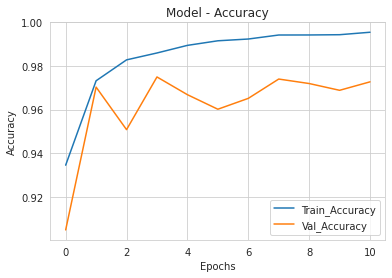

In [52]:
plt.plot(history.history['accuracy'], label="Train_Accuracy")
plt.plot(history.history['val_accuracy'], label = "Val_Accuracy")
plt.title("Model - Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = 4)
plt.show()


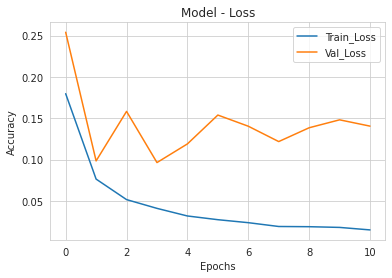

In [53]:
plt.plot(history.history['loss'], label="Train_Loss")
plt.plot(history.history['val_loss'], label = "Val_Loss")
plt.title("Model - Loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [54]:
from sklearn.metrics import confusion_matrix, classification_report
predictions = model.predict(X_test)
predictions


array([[1.0000000e+00, 2.9227829e-08, 1.1223993e-12, 2.5044514e-19,
        2.2764648e-16],
       [9.9996936e-01, 2.9839375e-05, 1.3565946e-07, 1.3598722e-10,
        6.6873724e-07],
       [9.9998522e-01, 1.4726590e-05, 7.7103239e-09, 2.2069387e-17,
        9.7447925e-09],
       ...,
       [5.0752349e-18, 5.9964580e-21, 5.6024334e-24, 0.0000000e+00,
        1.0000000e+00],
       [1.0976758e-26, 8.2488105e-23, 3.6851822e-25, 0.0000000e+00,
        1.0000000e+00],
       [4.7339201e-20, 2.9254482e-16, 3.1726250e-24, 0.0000000e+00,
        1.0000000e+00]], dtype=float32)

# **Confusion Matrix**

In [55]:
yhat = np.round(predictions)


In [56]:
yhat

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [57]:
# argmax = converts encoding value into integer class value
np.argmax(yhat, axis = 1)


array([0, 0, 0, ..., 4, 4, 4])

In [58]:
conf_matrix=confusion_matrix(np.argmax(y_test,axis=1),np.argmax(yhat,axis=1))

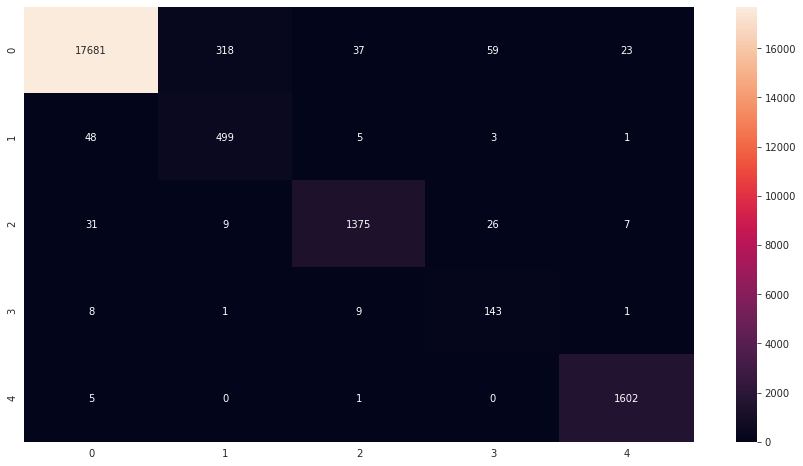

In [59]:
plt.figure(figsize=(15,8))
sns.heatmap(conf_matrix, annot=True, fmt='0.0f')

In [60]:
print(classification_report(np.argmax(y_test, axis = 1), np.argmax(yhat, axis = 1)))


              precision    recall  f1-score   support

           0       0.99      0.98      0.99     18118
           1       0.60      0.90      0.72       556
           2       0.96      0.95      0.96      1448
           3       0.62      0.88      0.73       162
           4       0.98      1.00      0.99      1608

    accuracy                           0.97     21892
   macro avg       0.83      0.94      0.88     21892
weighted avg       0.98      0.97      0.97     21892

